In [ ]:
%config InlineBackend.figure_format = 'retina'

In [ ]:
import scipy
import numpy as np
from scipy.special import fresnel
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation
import matplotlib.cm as cm
from matplotlib.colors import LightSource
import random

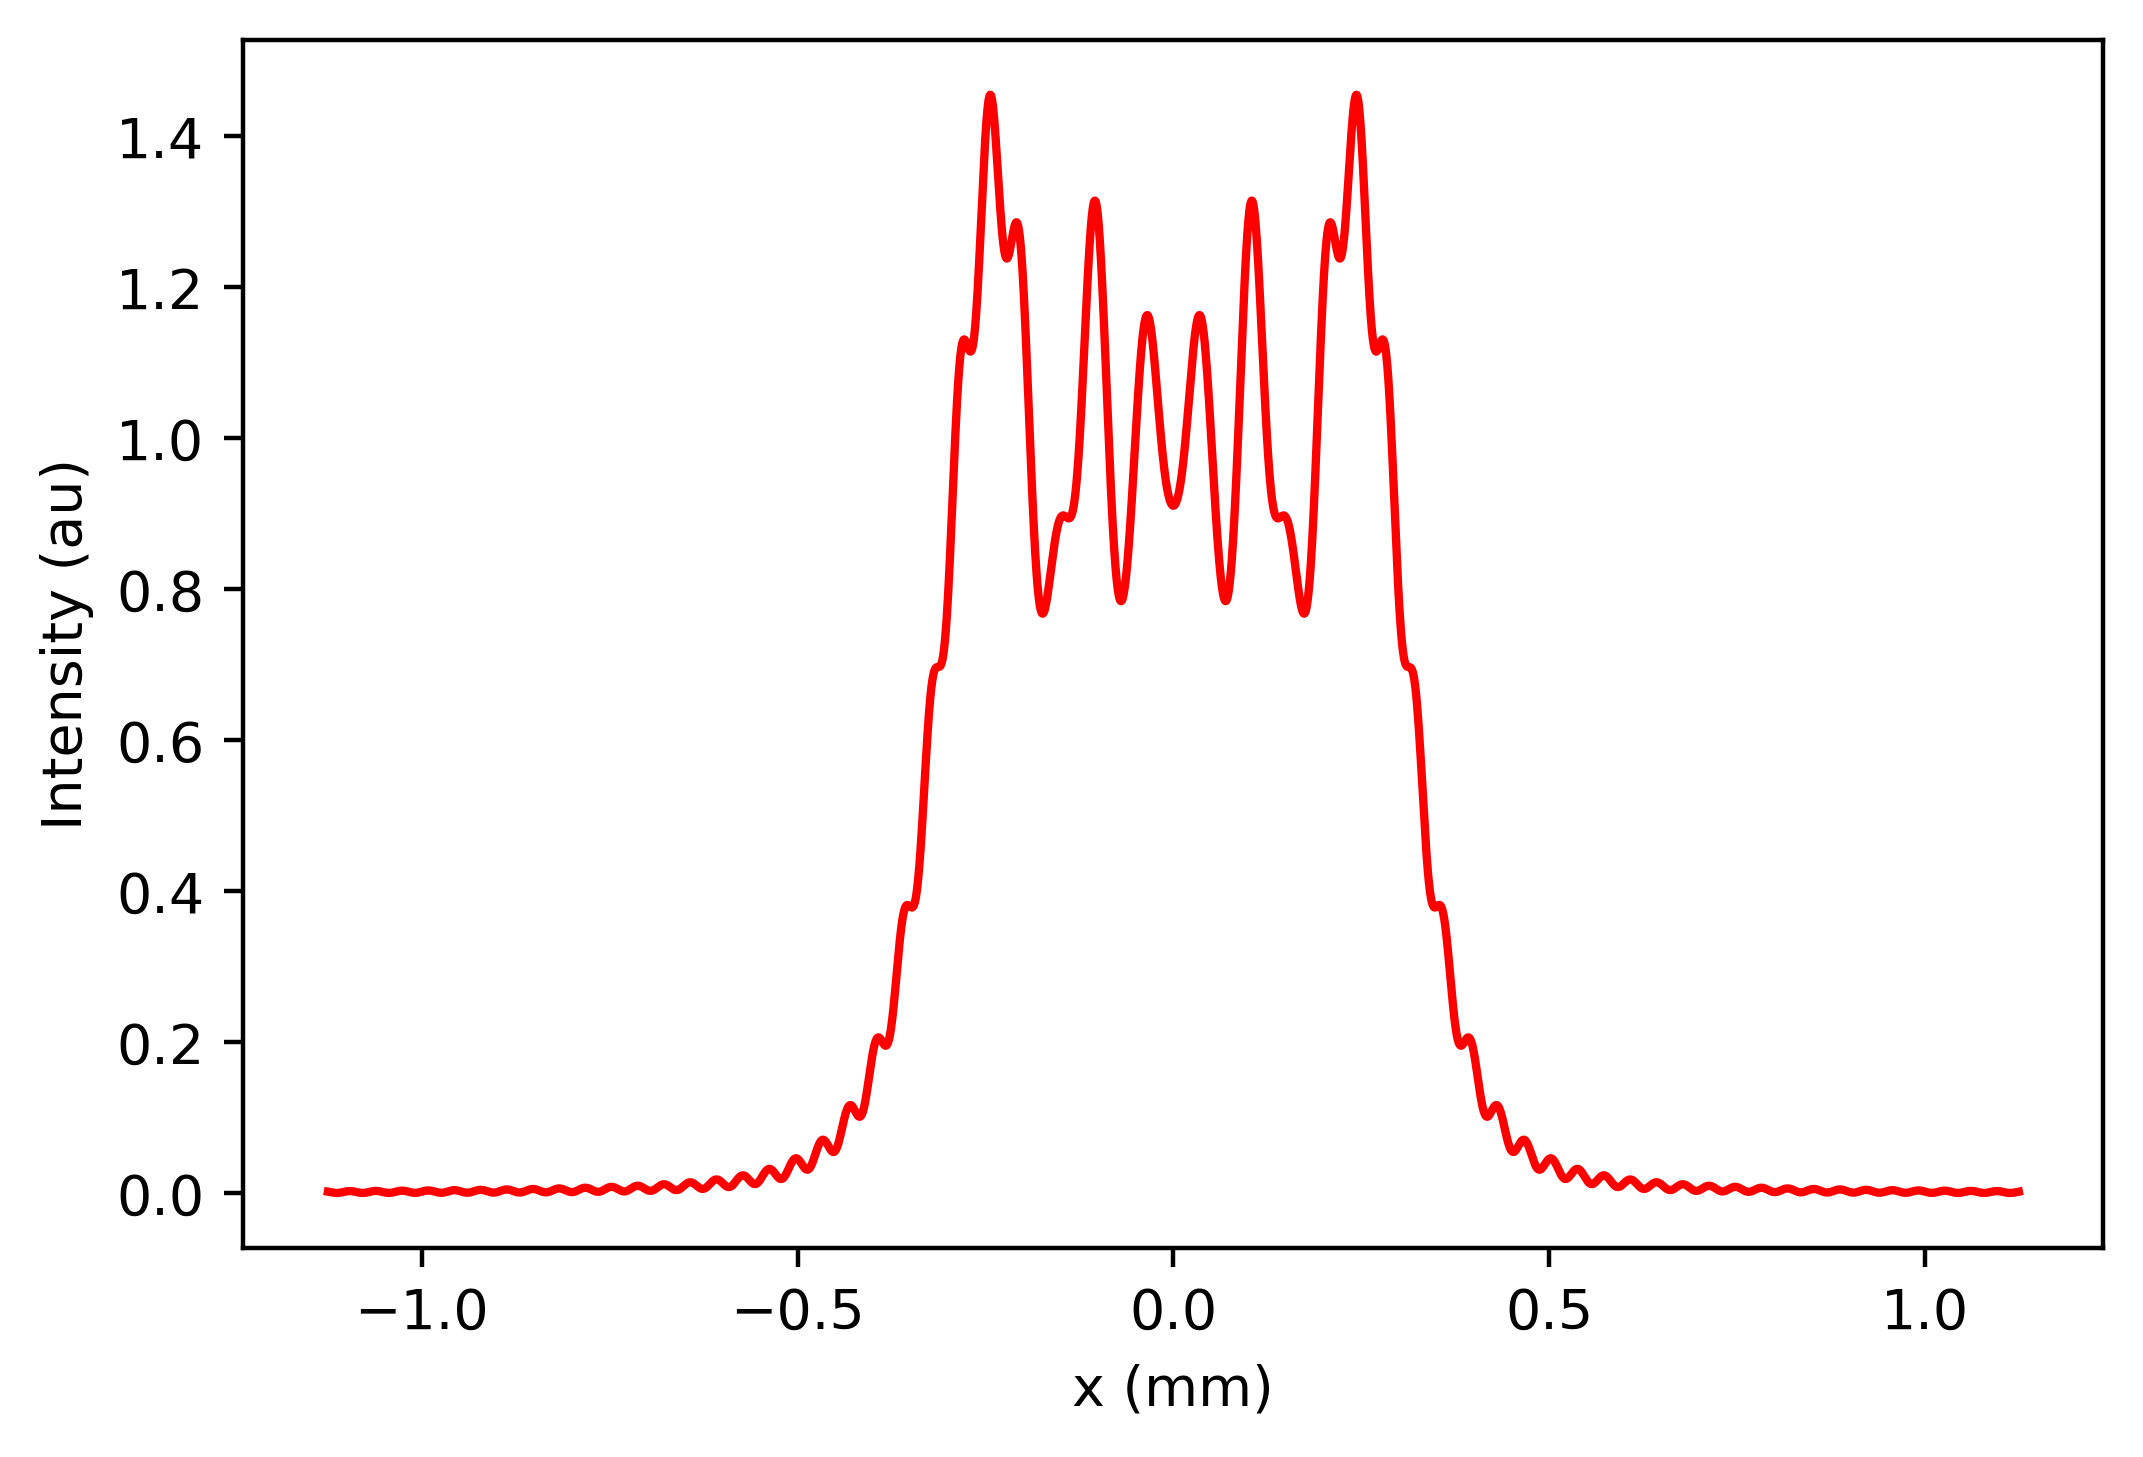

In [ ]:
# options: (interval between frames, [ms]; total frames count)
options = {"interval": 100, "frames": 50}
# minimum distance to the amplitude pattern, [mm]
z_0 = 50
# slitwidth, [mm]
d = 0.75
# wavelength, [mm]
lamda = 5.32e-4
# x axes on photoelement, [mm]
x = np.linspace(-1.5 * d, 1.5 * d, 5000)
# log10 of the distance between screen and light source, [mm]
z = np.linspace(0, 3, 1000)
intensity = []
def get_func(z):
    amplitude_map = np.zeros((len(x), len(z)))
    for i in range (len(z)-1):
        alpha_1 = (x + d / 2) * (np.sqrt(2 / (lamda * 10 ** z[i])))
        alpha_2 = (x - d / 2) * (np.sqrt(2 / (lamda * 10 ** z[i])))
        S1, C1 = fresnel(alpha_1)
        S2, C2 = fresnel(alpha_2)
        amplitude_map[:, i] = 0.5 * ((C2 - C1) ** 2 + (S2 - S1) ** 2)
    global intensity
    intensity = amplitude_map
    return amplitude_map

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 200  
fig, ax = plt.subplots()

def animate(t):
    ztemp = z_0 + 10 * t
    y_values = get_func(z)[:, np.where(10 ** z > ztemp - 1)[0][0]].tolist()
    ax.cla()
    ax.plot(x, y_values, c="r")
    plt.xlabel("x (mm)")
    plt.ylabel("Intensity (au)")

matplotlib.animation.FuncAnimation(fig, animate, frames=options["frames"], interval=options["interval"])

[[5.99582577e-06 8.16463644e-06 2.49068472e-05 ... 4.40814372e-02
  4.54212101e-02 0.00000000e+00]
 [4.54631149e-05 5.24812759e-05 5.10749492e-05 ... 4.41839312e-02
  4.55201597e-02 0.00000000e+00]
 [3.34360899e-05 2.17279226e-05 6.77328532e-06 ... 4.42863252e-02
  4.56189888e-02 0.00000000e+00]
 ...
 [3.34360899e-05 2.17279226e-05 6.77328532e-06 ... 4.42863252e-02
  4.56189888e-02 0.00000000e+00]
 [4.54631149e-05 5.24812759e-05 5.10749492e-05 ... 4.41839312e-02
  4.55201597e-02 0.00000000e+00]
 [5.99582577e-06 8.16463644e-06 2.49068472e-05 ... 4.40814372e-02
  4.54212101e-02 0.00000000e+00]]


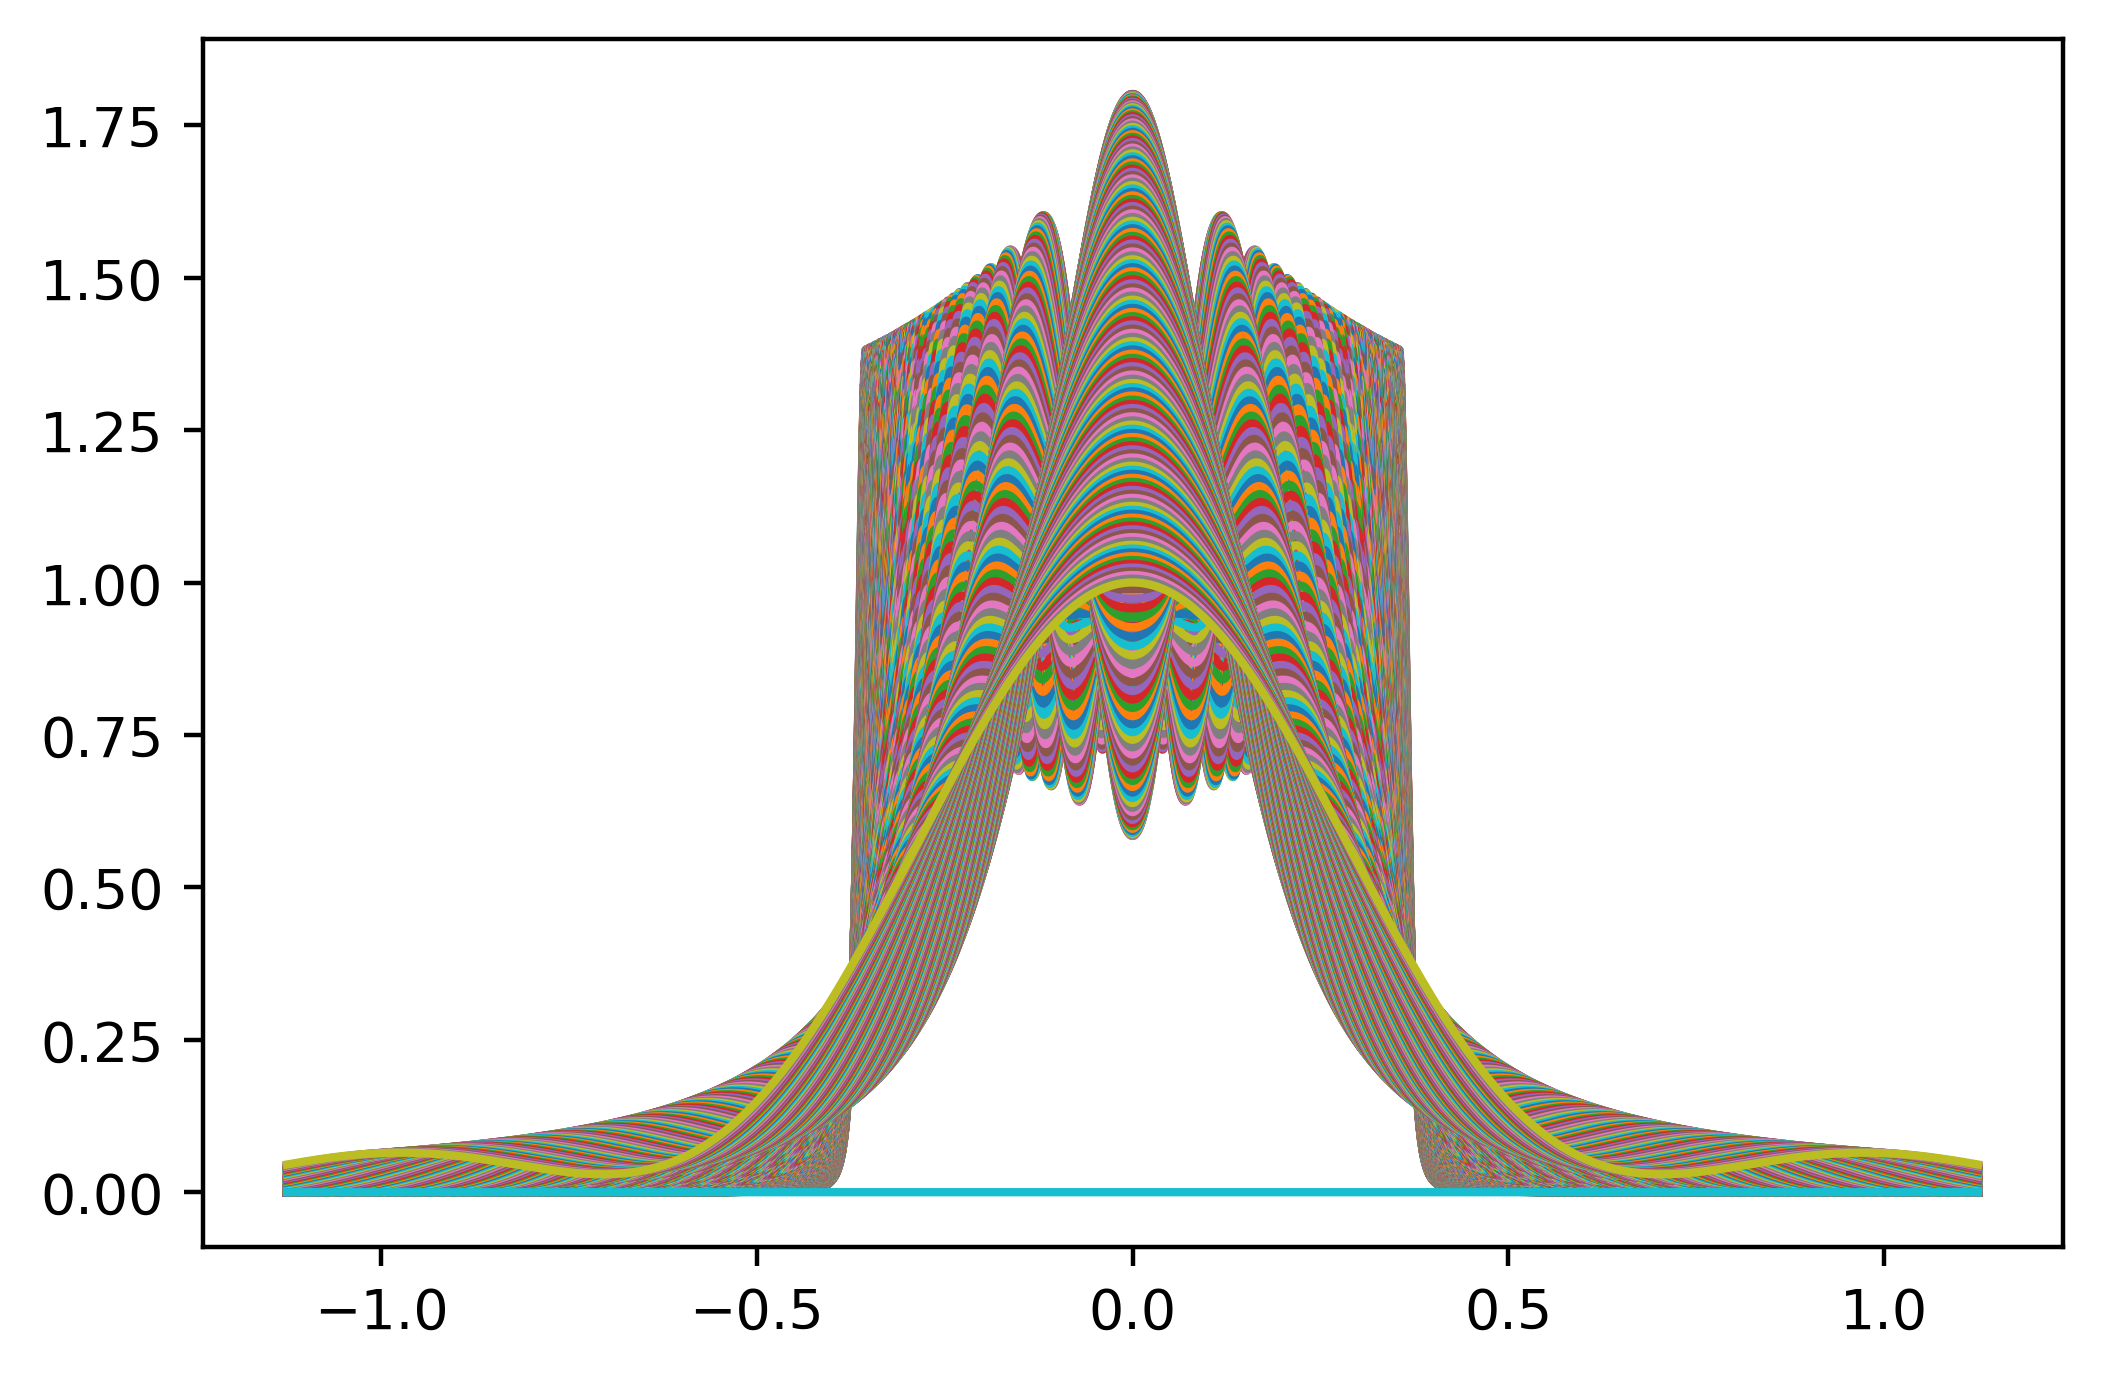

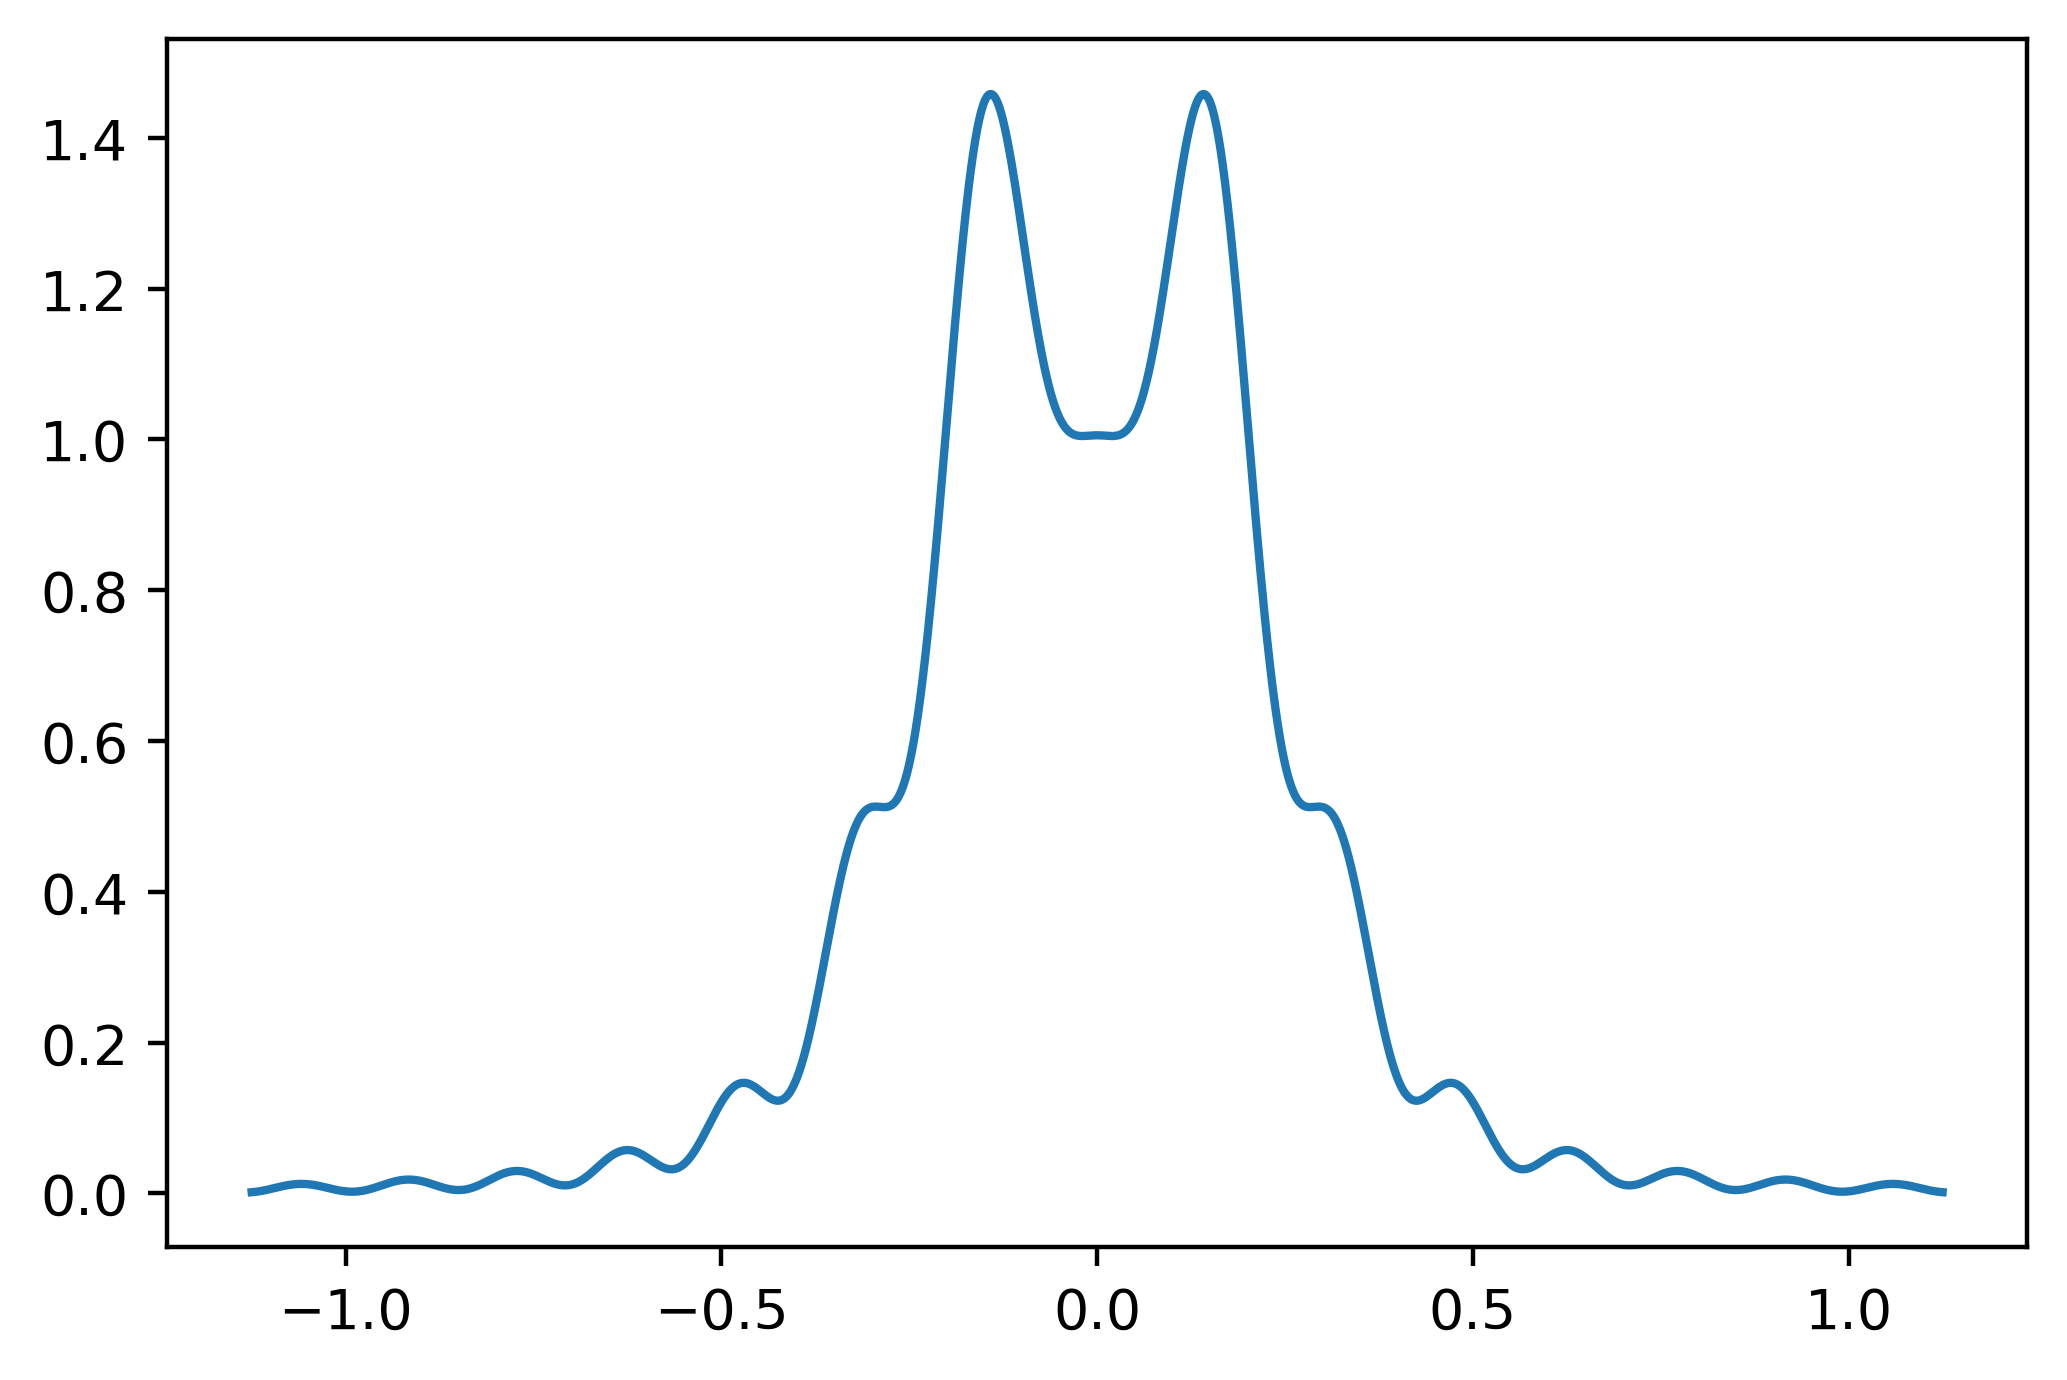

In [ ]:
'''
plot: all screen distance configurations
'''
print(intensity)
plt.figure(2)
plt.plot(x, intensity)
plt.show()
ztemp = 200
plt.figure(3)
amplitude = intensity[:, np.where(10 ** z > ztemp - 1)[0][0]].tolist()
x_min, x_max = min(x), max(x)
cnt_linspace = len(x)
plt.plot(x, amplitude)
plt.show()

In [ ]:
'''
plot: intensity in height representation - colormapped
'''
def compare(z, cmap, ve=1):
    fig, axs = plt.subplots(ncols=2, nrows=1)
    for ax in axs.flat:
        ax.set(xticks=[], yticks=[])

    ls = LightSource(azdeg=315, altdeg=45)
    axs[0].imshow(z, cmap=cmap)
    axs[0].set(xlabel='Normal amplitude mapping')

    rgb = ls.shade(z, cmap=cmap, vert_exag=ve, blend_mode='overlay')
    axs[1].imshow(rgb)
    axs[1].set(xlabel='Overlayed amplitude mapping')
    return fig

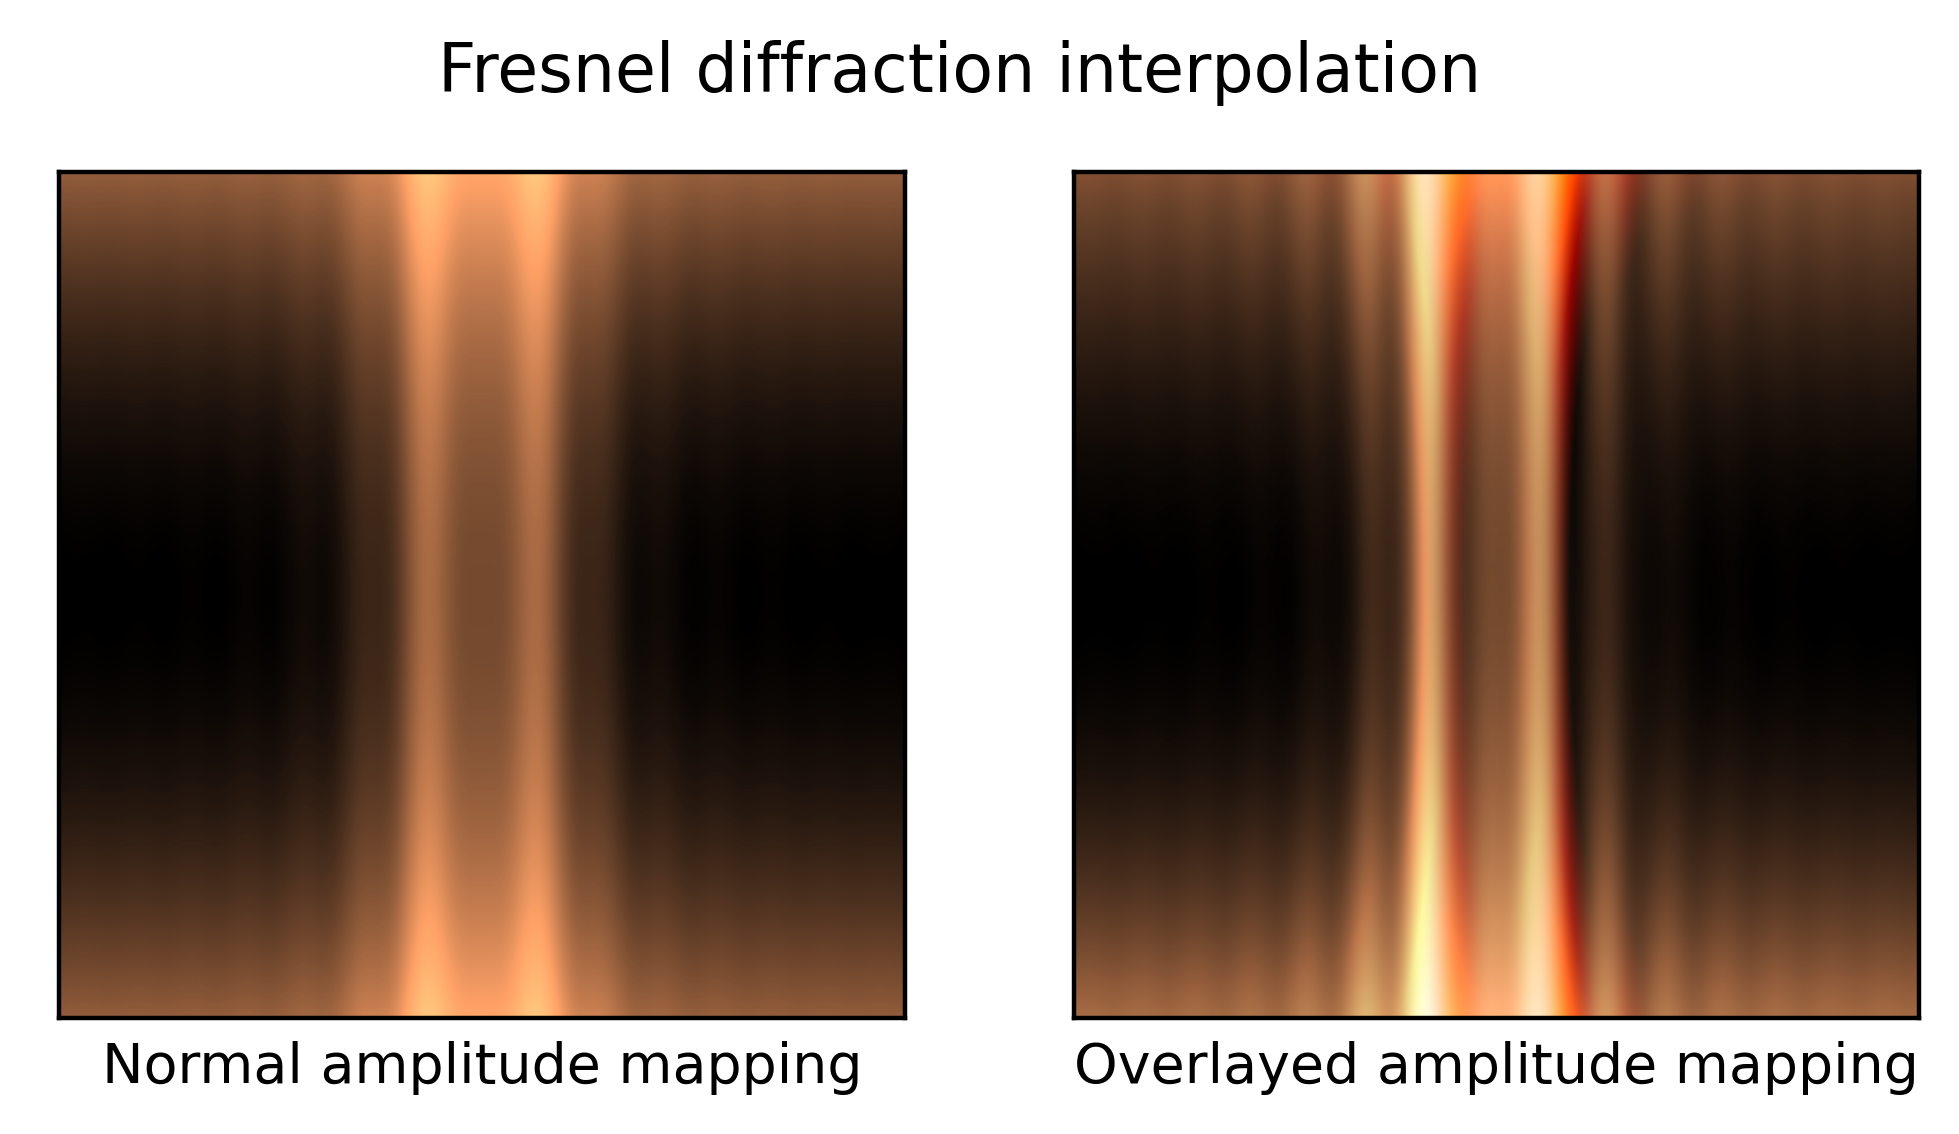

In [ ]:
def main():
    x = np.linspace(x_min, x_max, cnt_linspace)
    x, y = np.meshgrid(x, x)
    z = amplitude + y ** 2
    fig = compare(z, cm.copper)
    fig.suptitle("Fresnel diffraction interpolation", y=0.85)
    plt.show()

if __name__ == '__main__':
    main()